In [1]:
# import modules%pylab inline
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import librosa
import numpy as np
import pandas as pd
from librosa import display

In [2]:
x, sr = librosa.load('VZstock.wav')
print x.shape, sr

(42309,) 22050


In [3]:
ipd.Audio(x, rate=sr)

In [4]:
hop_length = 512
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length)
print onset_frames # frame numbers of estimated onsets

[ 3 21 28 42 45 53 65 71 74 80]


In [5]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)
print onset_times

[0.06965986 0.48761905 0.65015873 0.9752381  1.04489796 1.2306576
 1.50929705 1.64861678 1.71827664 1.85759637]


In [6]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)
print onset_samples

[ 1536 10752 14336 21504 23040 27136 33280 36352 37888 40960]


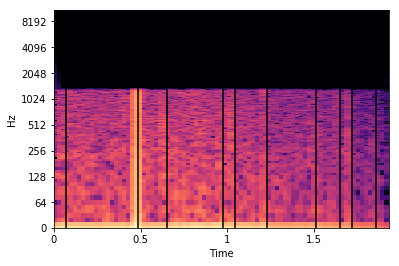

In [7]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [8]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = numpy.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(numpy.diff(onset_samples))   # every segment has uniform frame size
    return numpy.concatenate([
        numpy.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [9]:

concatenated_signal = concatenate_segments(x, onset_samples, 0.500)

In [10]:
ipd.Audio(concatenated_signal, rate=sr)

In [11]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length, backtrack=True)

In [12]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)

In [13]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

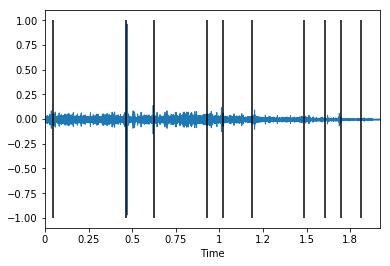

In [14]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

In [15]:
data = pd.read_csv('daily_vz.csv')

In [16]:
data

,timestamp,open,high,low,close,volume
0,2019-05-09,56.12,56.4000,55.930,56.015,5108080
1,2019-05-08,56.66,56.7000,56.250,56.380,12086010
2,2019-05-07,56.69,56.8150,56.330,56.630,12963827
3,2019-05-06,56.83,57.0900,56.740,56.910,10066145
4,2019-05-03,57.15,57.3600,56.870,57.240,9388228
5,2019-05-02,56.81,58.2300,56.680,56.990,14435436
6,2019-05-01,57.23,57.3000,56.520,56.520,11627436
7,2019-04-30,56.99,57.4500,56.755,57.190,15469002
8,2019-04-29,56.75,57.1700,56.710,56.840,13984965
9,2019-04-26,56.06,56.8150,55.825,56.580,16329727


In [29]:
data.sort_values(by='volume', ascending=False)

,timestamp,open,high,low,close,volume
1311,2014-02-24,47.0200,47.200,46.230,46.23,616620500
1310,2014-02-25,46.4200,46.760,46.190,46.29,145797400
1308,2014-02-27,46.3400,47.780,46.280,47.50,139433900
1309,2014-02-26,46.0900,46.500,45.885,46.35,102687200
1729,2012-06-22,43.6100,43.950,43.490,43.95,83961300
2824,2008-02-20,34.6300,35.610,33.300,35.24,77769500
3356,2006-01-06,31.6000,31.600,31.160,31.35,64153100
1307,2014-02-28,47.4500,47.760,47.210,47.58,62309000
1312,2014-02-21,47.5499,48.250,47.180,47.27,60808800
1306,2014-03-03,47.3000,47.680,46.820,47.31,60287600


In [17]:
close = data["close"]

In [18]:
close

0       56.015
1       56.380
2       56.630
3       56.910
4       57.240
5       56.990
6       56.520
7       57.190
8       56.840
9       56.580
10      55.850
11      57.080
12      57.150
13      58.370
14      58.040
15      57.780
16      58.790
17      58.710
18      58.740
19      58.560
20      58.610
21      58.400
22      59.130
23      59.090
24      58.990
25      58.870
26      58.530
27      59.090
28      59.130
29      59.080
         ...  
5342    88.870
5343    89.440
5344    90.190
5345    89.870
5346    90.690
5347    91.000
5348    91.000
5349    92.250
5350    93.500
5351    92.870
5352    92.560
5353    92.120
5354    91.750
5355    91.620
5356    90.750
5357    91.000
5358    91.000
5359    90.190
5360    90.620
5361    89.120
5362    89.000
5363    89.310
5364    89.310
5365    88.120
5366    86.560
5367    87.250
5368    88.500
5369    90.310
5370    88.190
5371    90.940
Name: close, Length: 5372, dtype: float64

In [19]:
volume = data["volume"]
volume

0        5108080
1       12086010
2       12963827
3       10066145
4        9388228
5       14435436
6       11627436
7       15469002
8       13984965
9       16329727
10      17425466
11      13227084
12      23488682
13      11950365
14      13189013
15      15498037
16      10239261
17       7741472
18      10847504
19       9219930
20       8782061
21      10414416
22      11680538
23      11497780
24       8776028
25      15491724
26      11408146
27      16331140
28      17283871
29      20547060
          ...   
5342     1201300
5343     2013750
5344     1167900
5345     1350850
5346     1234550
5347     1498300
5348     1861750
5349     1567450
5350     1337500
5351     1848100
5352     1544650
5353     1933450
5354     1721350
5355     2447850
5356     1065850
5357     1857350
5358     1576150
5359     1351850
5360     1129900
5361     1299350
5362      848550
5363      941600
5364     1439500
5365     1923400
5366     1918800
5367     2003100
5368     1915800
5369     22662

In [20]:
volume.max()

616620500

In [21]:
time = data["timestamp"]
time

0       2019-05-09
1       2019-05-08
2       2019-05-07
3       2019-05-06
4       2019-05-03
5       2019-05-02
6       2019-05-01
7       2019-04-30
8       2019-04-29
9       2019-04-26
10      2019-04-25
11      2019-04-24
12      2019-04-23
13      2019-04-22
14      2019-04-18
15      2019-04-17
16      2019-04-16
17      2019-04-15
18      2019-04-12
19      2019-04-11
20      2019-04-10
21      2019-04-09
22      2019-04-08
23      2019-04-05
24      2019-04-04
25      2019-04-03
26      2019-04-02
27      2019-04-01
28      2019-03-29
29      2019-03-28
           ...    
5342    1998-02-13
5343    1998-02-12
5344    1998-02-11
5345    1998-02-10
5346    1998-02-09
5347    1998-02-06
5348    1998-02-05
5349    1998-02-04
5350    1998-02-03
5351    1998-02-02
5352    1998-01-30
5353    1998-01-29
5354    1998-01-28
5355    1998-01-27
5356    1998-01-26
5357    1998-01-23
5358    1998-01-22
5359    1998-01-21
5360    1998-01-20
5361    1998-01-16
5362    1998-01-15
5363    1998

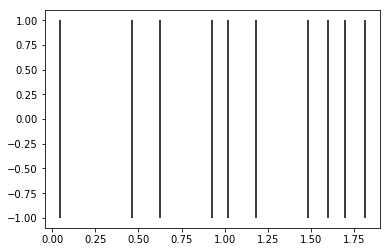

In [22]:
plt.vlines(onset_times, -1, 1, color='k')

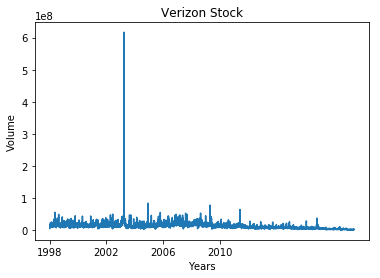

In [28]:
plt.plot(volume)

plt.xticks([tick*1000 for tick in range(0,4)],[z for z in range(1998,2019,4)])

plt.title("Verizon Stock")

plt.xlabel('Years')
plt.ylabel('Volume')

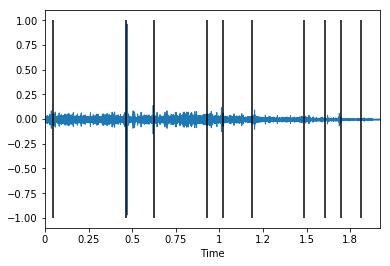

In [23]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

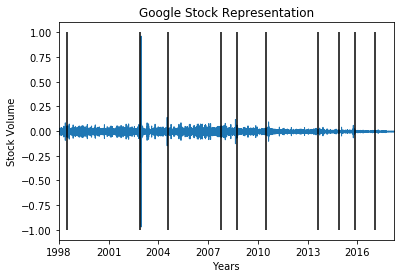

In [24]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.title("Google Stock Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume')

#plt.yticks(list(range(100, 0,-20)))

In [25]:
[z for z in range(1998,2019,3)]

[1998, 2001, 2004, 2007, 2010, 2013, 2016]

In [26]:
[tick*.0714 for tick in range(0,7)]

[0.0, 0.0714, 0.1428, 0.2142, 0.2856, 0.35700000000000004, 0.4284]

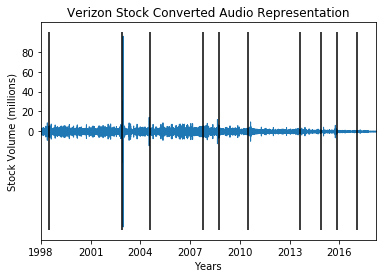

In [27]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

#plt.yticks(100, 1000, 500)

#plt.yticks(np.arange(0, 82, step=10))

plt.yticks([tick*.2 for tick in range(0,5)],[z for z in range(0,100,20)])

#

plt.title("Verizon Stock Converted Audio Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume (millions)')

#plt.yticks(list(range(100, 0,-20)))

